# Rethinking PM2.5 Exposure: Chronic Disease Trends in the U.S. (2015 – 2019)
Chronic diseases such as cardiovascular disease, respiratory disorders, and cancer remain major health burdens in the United States. At the same time, PM2.5 air pollution continues to raise global concerns due to its proven links to respiratory and cardiovascular outcomes.
This project aims to analyze U.S. chronic disease prevalence alongside national PM2.5 trends and to compare U.S. air quality patterns with global PM2.5 levels. Together, these trends help contextualize how air pollution may relate to population health in the United States.

In [1]:
import os
import pandas as pd
from config import DATA_DIR, RESULTS_DIR, aqs_epa_url, chronic_url, who_url
from load import retrieve_file_pm25, retrieve_file_chronic, retrieve_file_pm25_who
from process import process_pm25, process_chronic, process_pm25_who, aggregate_us_pm25, aggregate_us_chronic, merge_us_data
from analyze import calculate_correlation, plot_us_trends, plot_global_comparison, plot_disease_heatmap, plot_all_chronic_trends, plot_correlation_bar_chart, plot_correlation_scatters

#  U.S. EPA AQS API data

In [2]:
# Create a data directory
os.makedirs(DATA_DIR, exist_ok=True)

# --- U.S. EPA AQS API data ---
pm25_data = retrieve_file_pm25(aqs_epa_url)
pm25_5states_8years = process_pm25(pm25_data)

# Aggregate PM2.5 and get the clean DataFrame
if pm25_5states_8years is not None:
    df_pm25_agg = aggregate_us_pm25(pm25_5states_8years)
    print(f"\nU.S. PM2.5 Aggregated Data Head:\n{df_pm25_agg.head()}\n")

Loading data from https://aqs.epa.gov/data/api/annualData/byState...
U.S. PM2.5 concentration data loaded successfully

Processing U.S. PM2.5 data...
    Data length: Year 20150101 - PM2.5 concentration = 2910
    Data length: Year 20160101 - PM2.5 concentration = 2588
    Data length: Year 20170101 - PM2.5 concentration = 2826
    Data length: Year 20180101 - PM2.5 concentration = 3197
    Data length: Year 20190101 - PM2.5 concentration = 2902
    Data length: Year 20200101 - PM2.5 concentration = 3515
    Data length: Year 20210101 - PM2.5 concentration = 3772
    Data length: Year 20220101 - PM2.5 concentration = 3560
U.S. PM2.5 concentration data processed successfully

U.S. PM2.5 aggregated to 40 State-Year rows.

U.S. PM2.5 Aggregated Data Head:
   year       state   avg_pm25
0  2015  California   9.672352
1  2015    Colorado   6.501713
2  2015    Illinois  10.029168
3  2015    New York   7.886730
4  2015       Texas   9.572449



# U.S. Chronic disease data from web

In [3]:
# --- U.S. chronic disease data from web---
chronic_data = retrieve_file_chronic(chronic_url)
chronic_5state_8years = process_chronic(chronic_data)

# Aggregate chronic disease and get the clean DataFrame
if chronic_5state_8years is not None:
    df_chronic_agg = aggregate_us_chronic(chronic_5state_8years)
    print(f"\nU.S. Chronic Disease Aggregated Data Head:\n{df_chronic_agg.head()}")

Loading data from https://data.cdc.gov/api/views/hksd-2xuw/rows.json?accessType=DOWNLOAD...
U.S. Chronic disease data loaded successfully

Processing U.S. chronic disease data...
    Cleaned data length: U.S. chronic disease age-adjusted prevalence rate (5 states, 8 years) = 654
Chronic disease data processed successfully.

U.S. Chronic Disease aggregated to 281 State-Year-Disease rate rows.

U.S. Chronic Disease Aggregated Data Head:
        state  year                                disease unit  \
0  California  2019                                Alcohol    %   
1  California  2019                              Arthritis    %   
2  California  2019                                 Asthma    %   
3  California  2019                 Cardiovascular Disease    %   
4  California  2019  Chronic Obstructive Pulmonary Disease    %   

   avg_prevalence_rate  
0            17.300000  
1            31.685714  
2             8.300000  
3            37.600000  
4            13.400000  


# Global PM2.5 data from Google drive

In [5]:
pm25_who_data = retrieve_file_pm25_who(who_url, extract_dir=DATA_DIR)
pm25_who_5years = process_pm25_who(pm25_who_data)
if pm25_who_5years is not None:
    df_pm25_who = pd.DataFrame(pm25_who_5years)
    print(f"\nPM 2.5 Worldwide Data Head:\n{df_pm25_who.head()}\n")

# --- Global PM2.5 data from Google drive ---
pm25_who_data = retrieve_file_pm25_who(who_url, extract_dir=DATA_DIR)
pm25_who_5years = process_pm25_who(pm25_who_data)
if pm25_who_5years is not None:
    df_pm25_who = pd.DataFrame(pm25_who_5years)
    print(f"\nGlobal PM 2.5 Data Head:\n{df_pm25_who.head()}\n")

Loading data from https://drive.google.com/file/d/1Biiamr8qiEv3IZi0o8E7O1ylMBfcuBJh/view?usp=share_link...
Global PM2.5 concentration data saved to ../data/who_pm25.csv
Loading ../data/who_pm25.csv into DataFrame...
Global PM2.5 concentration data loaded successfully

Processing Global PM2.5 data...
    Data length: Global PM2.5 (5 years) = 4725
Global PM2.5 data processed successfully


PM 2.5 Worldwide Data Head:
                                             country  year  value
0                                              Kenya  2019  10.01
1                                Trinidad and Tobago  2019  10.02
2  United Kingdom of Great Britain and Northern I...  2019  10.06
3                                            Grenada  2019  10.08
4                                             Brazil  2019  10.09

Loading data from https://drive.google.com/file/d/1Biiamr8qiEv3IZi0o8E7O1ylMBfcuBJh/view?usp=share_link...
Global PM2.5 concentration data saved to ../data/who_pm25.csv
Loading ../data

# Merge the two U.S. datasets for analysis

In [6]:
if 'df_pm25_agg' in locals() and 'df_chronic_agg' in locals():
    df_merged_us = merge_us_data(df_pm25_agg, df_chronic_agg)
    print(f"\nMerged U.S. Data Head:\n{df_merged_us.head()}")
print("\n--- Data aggregation and merging complete. Proceed to analysis. ---")

U.S. Data Merged (Outer join). Resulting DataFrame has 301 rows.

Merged U.S. Data Head:
        state  year  disease unit  avg_prevalence_rate   avg_pm25
0  California  2015      NaN  NaN                  NaN   9.672352
1  California  2016      NaN  NaN                  NaN   9.168501
2  California  2017      NaN  NaN                  NaN   9.681820
3  California  2018      NaN  NaN                  NaN  10.471050
4  California  2019  Alcohol    %                 17.3   7.850570

--- Data aggregation and merging complete. Proceed to analysis. ---


# ANALYSIS AND VISUALIZATION

# Correlation analysis, correlation bar chart and scatter plots

Targeted disease:
['Alcohol', 'Arthritis', 'Asthma', 'Cardiovascular Disease', 'Chronic Obstructive Pulmonary Disease', 'Cognitive Health and Caregiving', 'Diabetes', 'Disability', 'Health Status', 'Immunization', 'Mental Health', 'Nutrition, Physical Activity, and Weight Status', 'Social Determinants of Health', 'Tobacco', 'Cancer', 'Oral Health', 'Sleep']

--- Performing Correlation Analysis ---
Results for Alcohol Rate vs. PM2.5: rho = -0.3033, P-Value = 0.1935
Results for Arthritis Rate vs. PM2.5: rho = 0.2107, P-Value = 0.4510
Results for Asthma Rate vs. PM2.5: rho = -0.5064, P-Value = 0.0227
Results for Cardiovascular Disease Rate vs. PM2.5: rho = 0.1885, P-Value = 0.6021
Results for Chronic Obstructive Pulmonary Disease Rate vs. PM2.5: rho = 0.1753, P-Value = 0.4599
Results for Cognitive Health and Caregiving Rate vs. PM2.5: rho = -0.4000, P-Value = 0.2861
Results for Diabetes Rate vs. PM2.5: rho = 0.4332, P-Value = 0.0564
Results for Disability Rate vs. PM2.5: rho = 0.2333, P-V

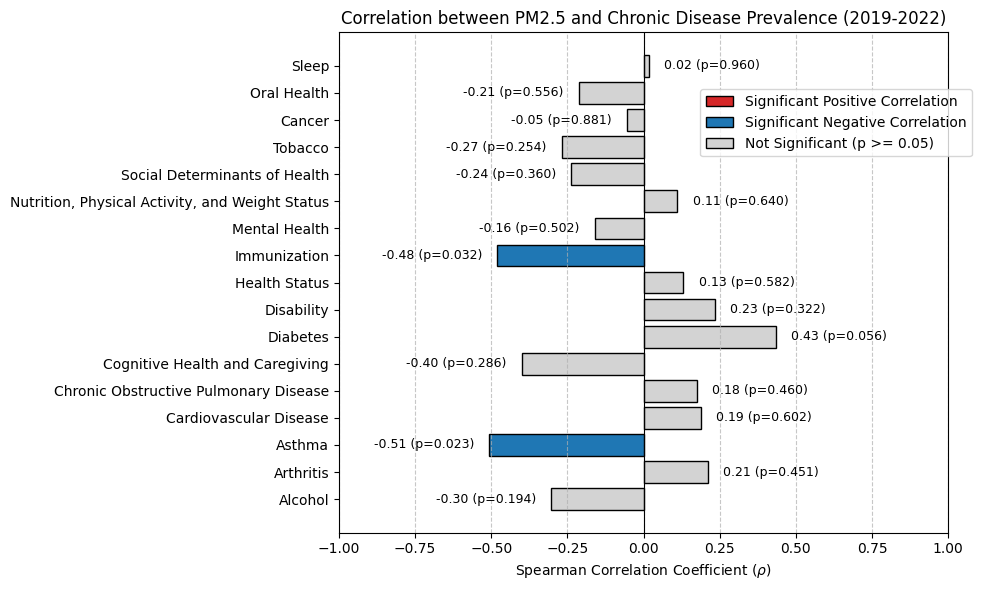

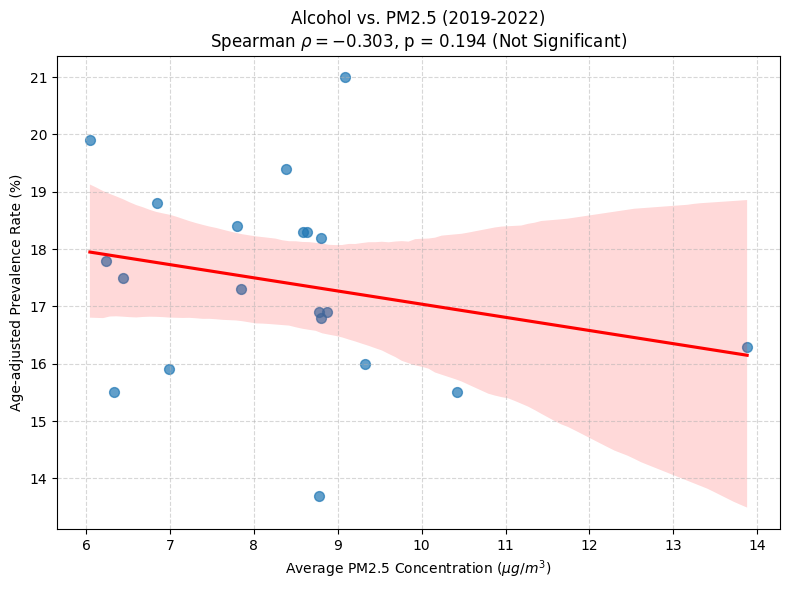

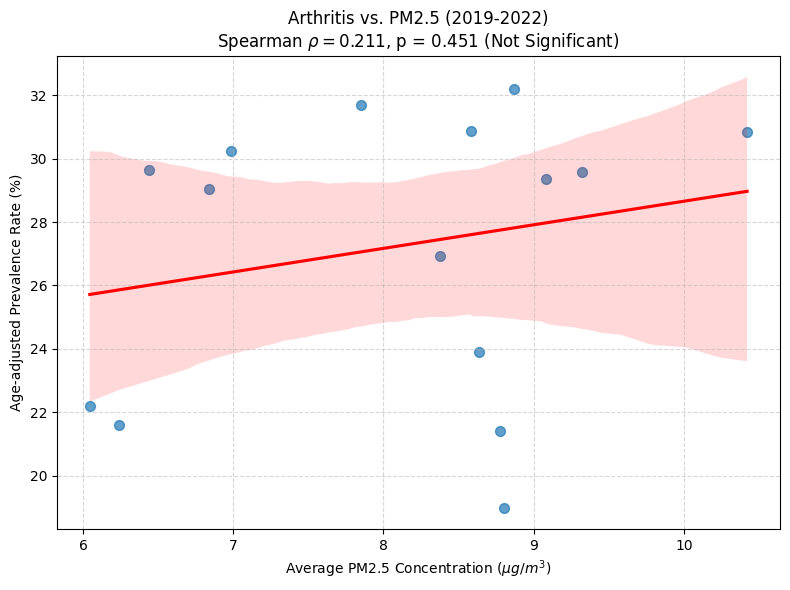

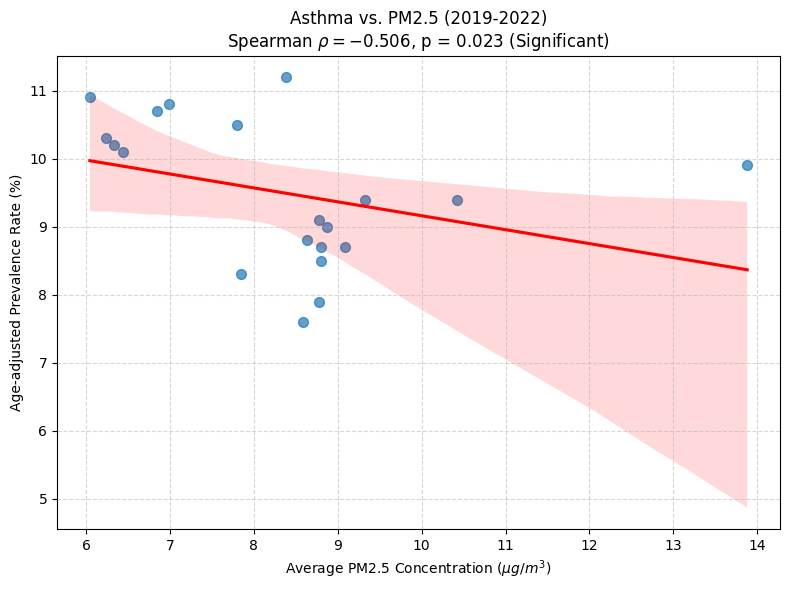

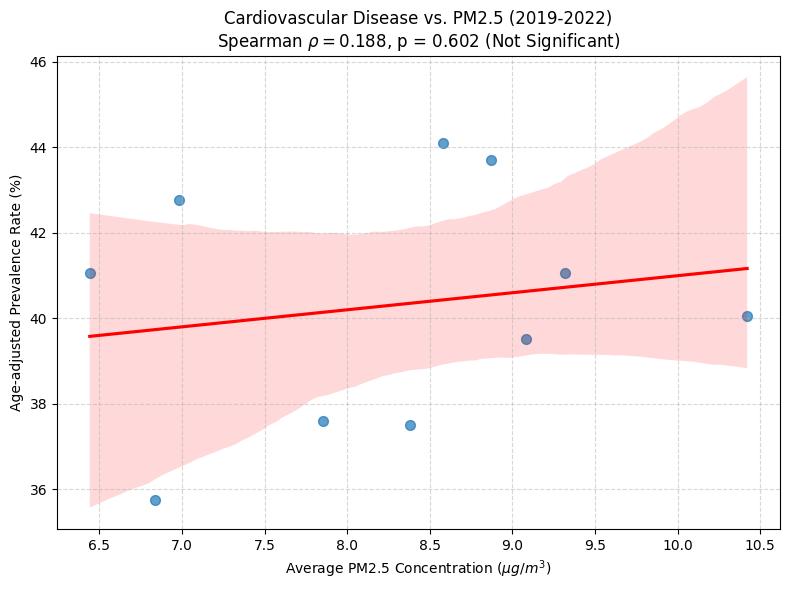

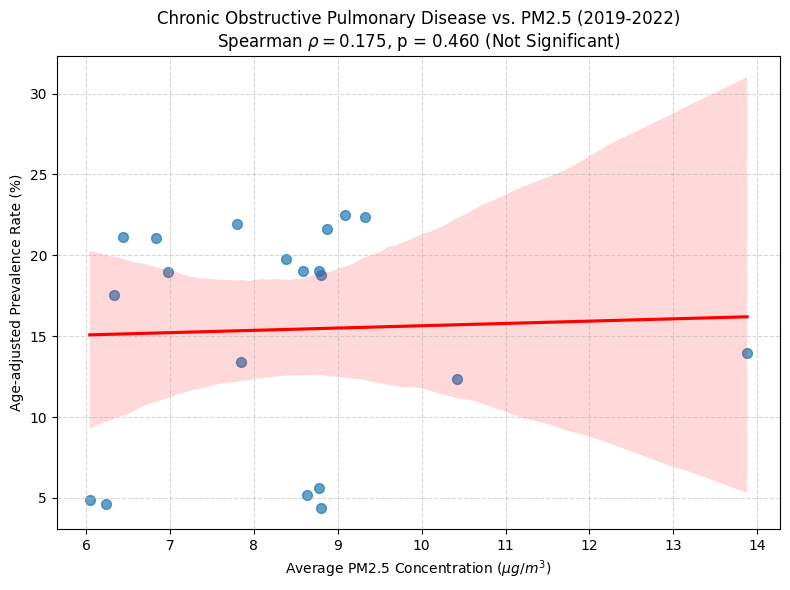

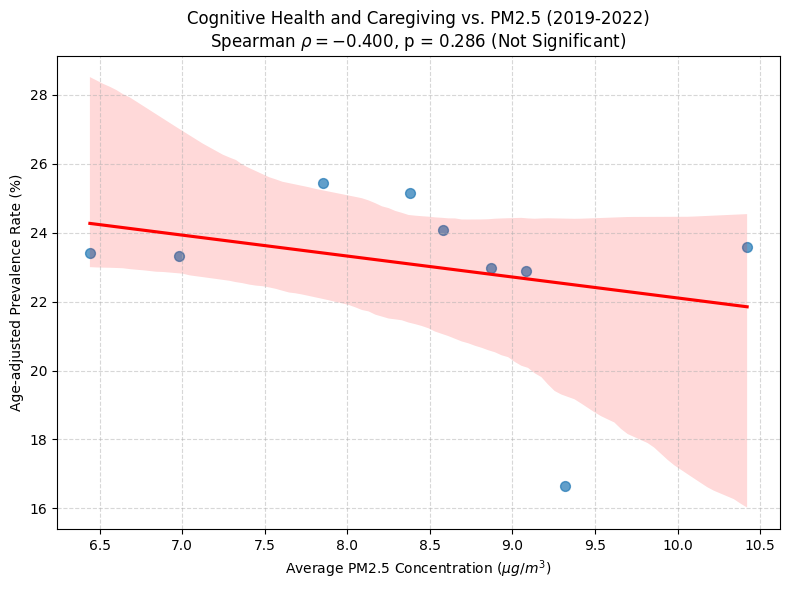

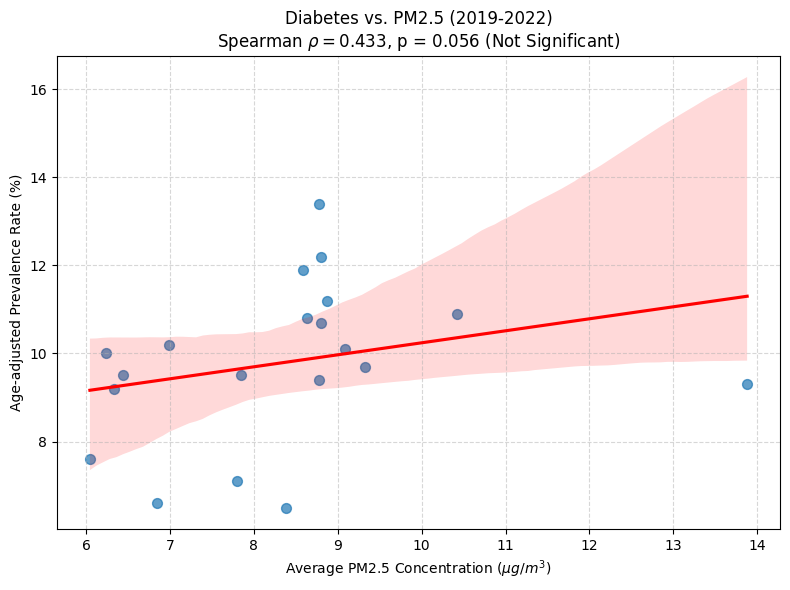

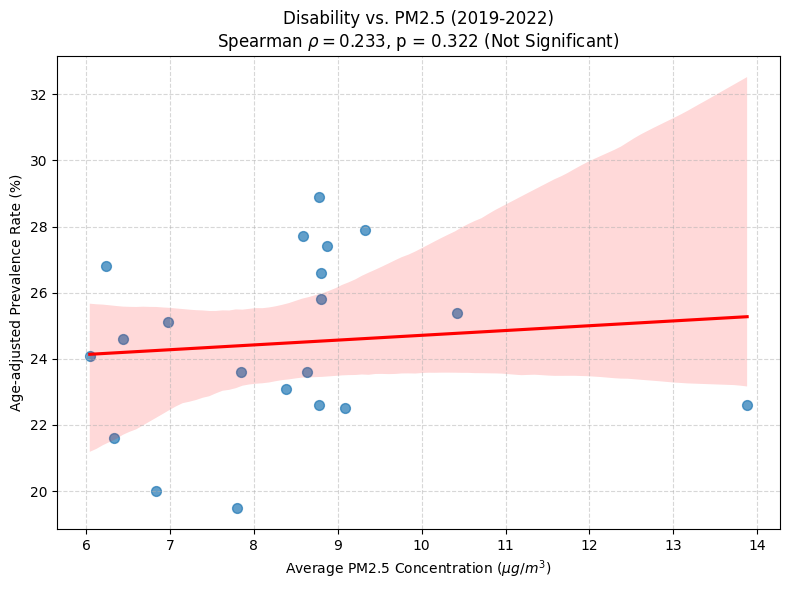

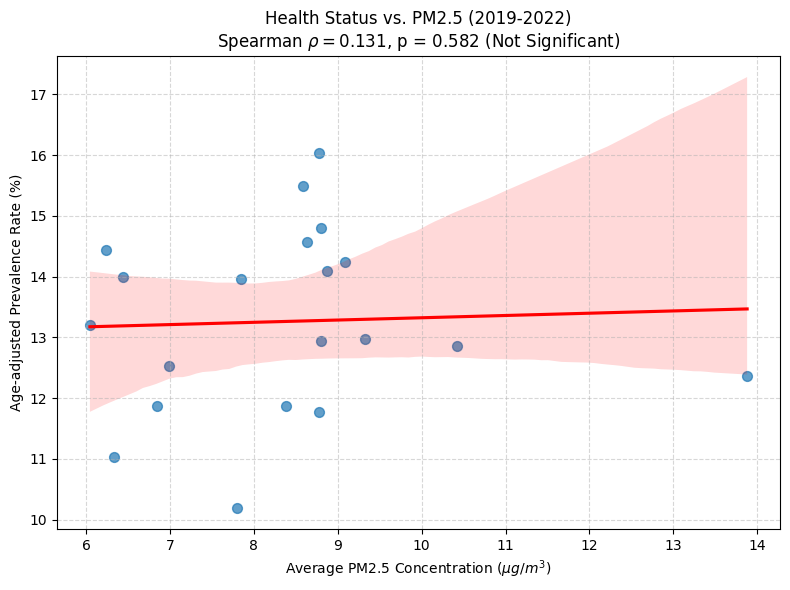

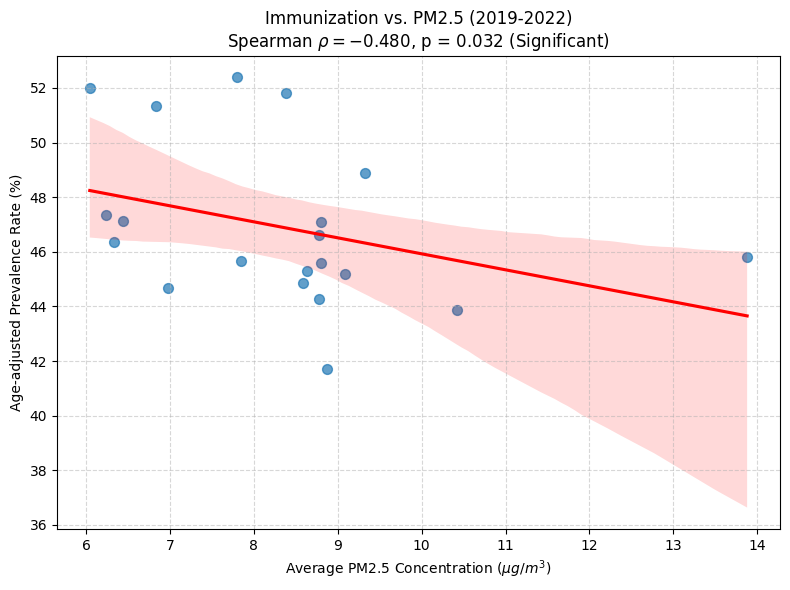

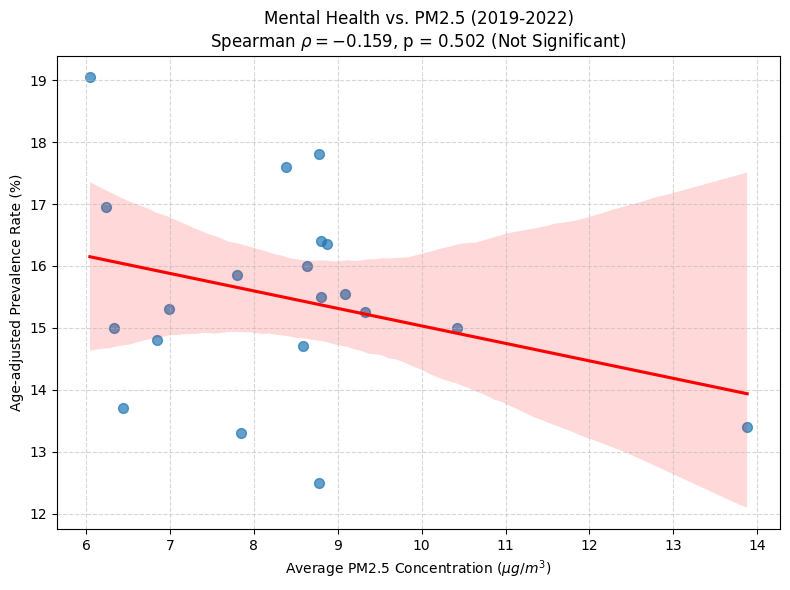

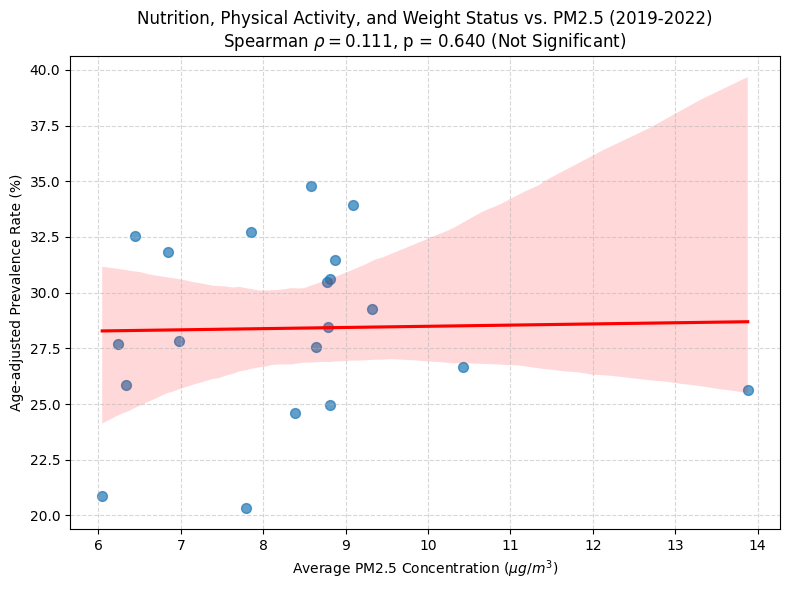

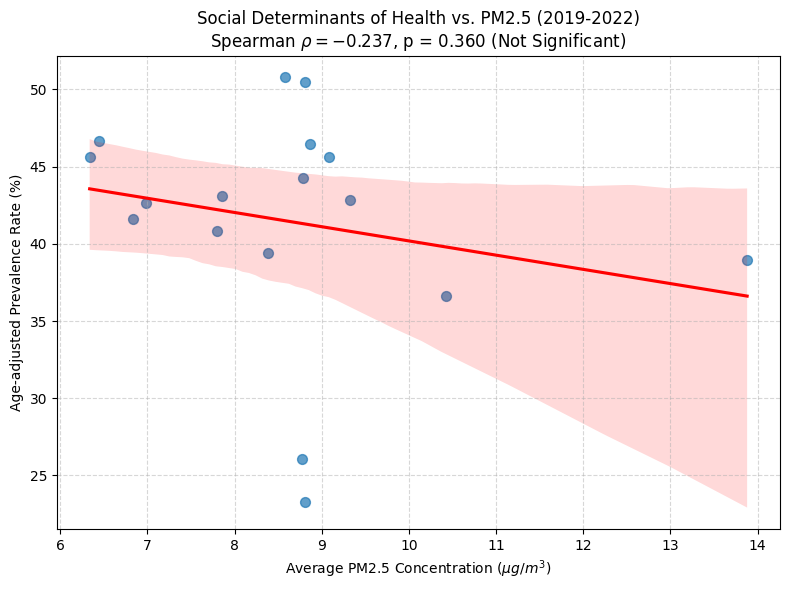

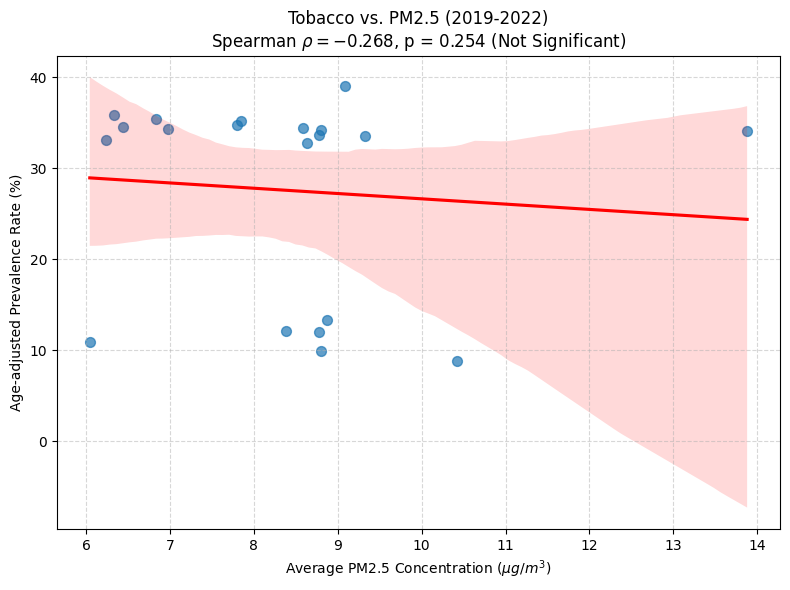

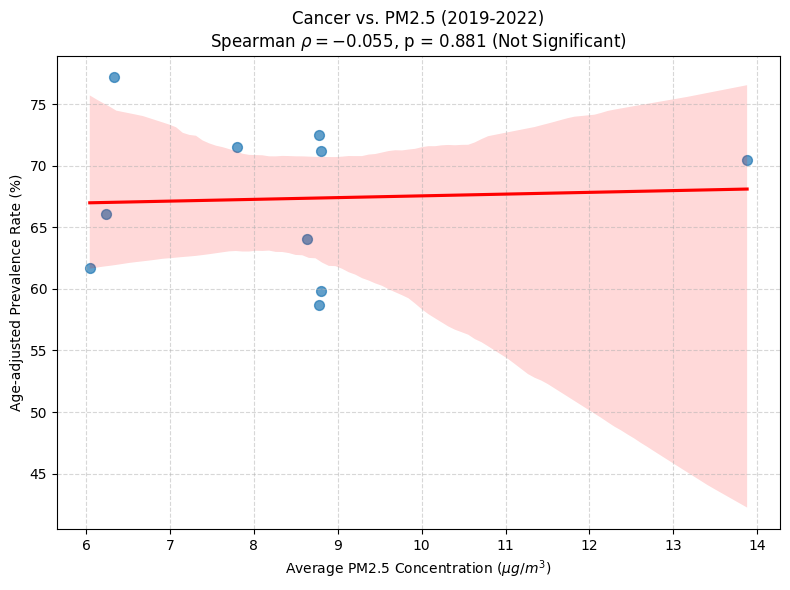

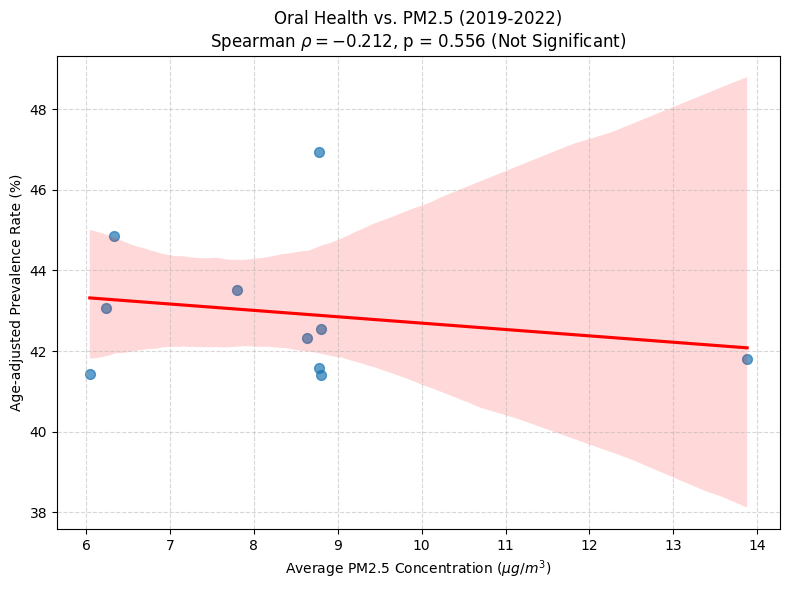

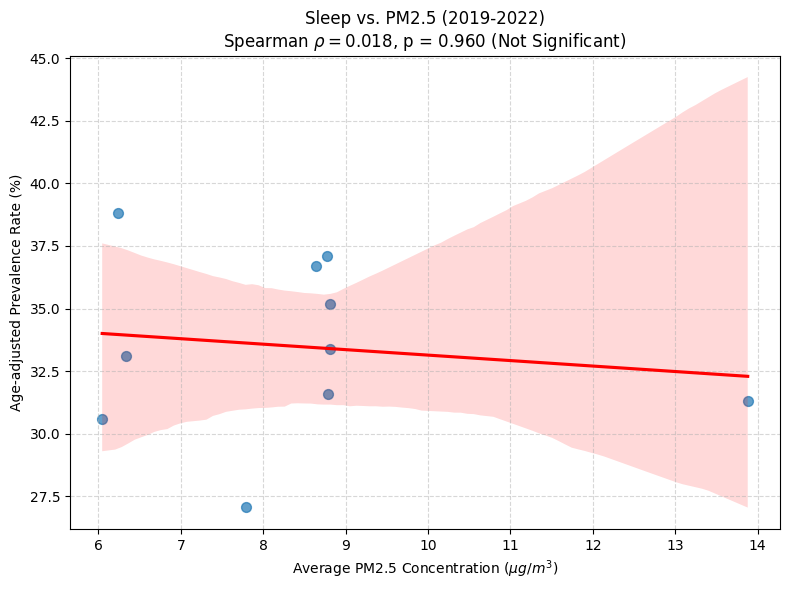

In [7]:
if 'df_merged_us' in locals():
    correlation_results = calculate_correlation(df_merged_us)

    print("\n--- Summary Correlation Results ---")
    for disease, res in correlation_results.items():
        if res['status'] == 'Success':
            print(f"  {disease}: rho={res['rho']:.4f}, p={res['p_value']:.4f}")
        else:
            print(f"  {disease}: {res['status']}")

    plot_correlation_bar_chart(correlation_results, RESULTS_DIR, notebook_plot=True)
    plot_correlation_scatters(df_merged_us, correlation_results, RESULTS_DIR, notebook_plot=True)

# Generate U.S. PM2.5 and chronic disease prevalence trend plots


--- Generating U.S. Trend Plots ---

--- Generating All Chronic Diseases Trend Plots ---
Skipping plot for nan (nan): No data found.
All individual disease trend plots have been generated.


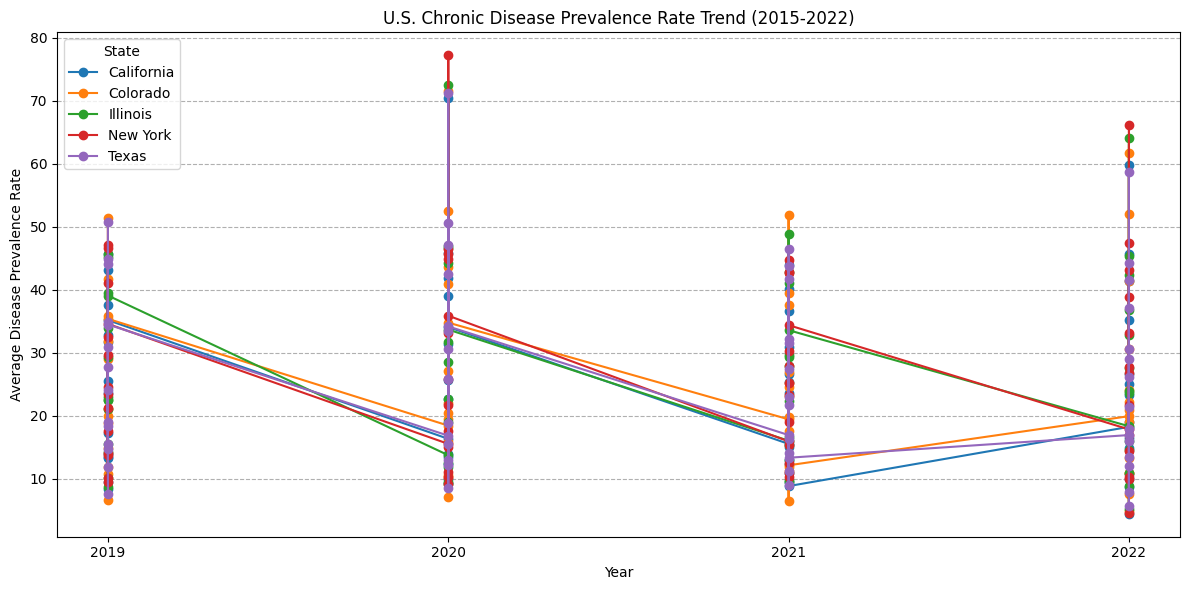

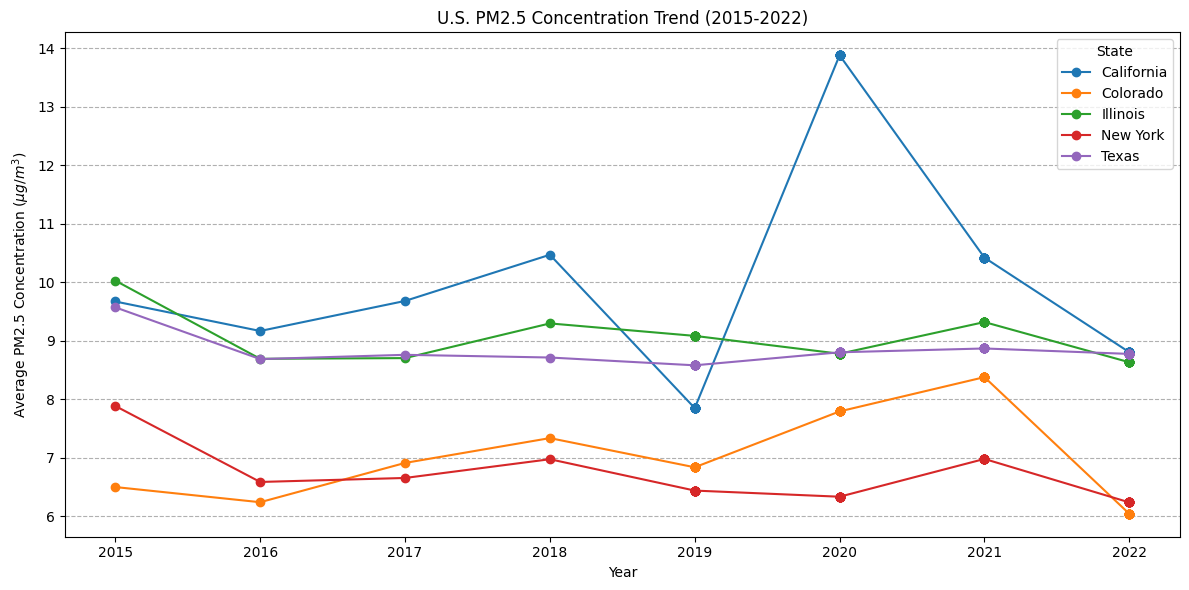

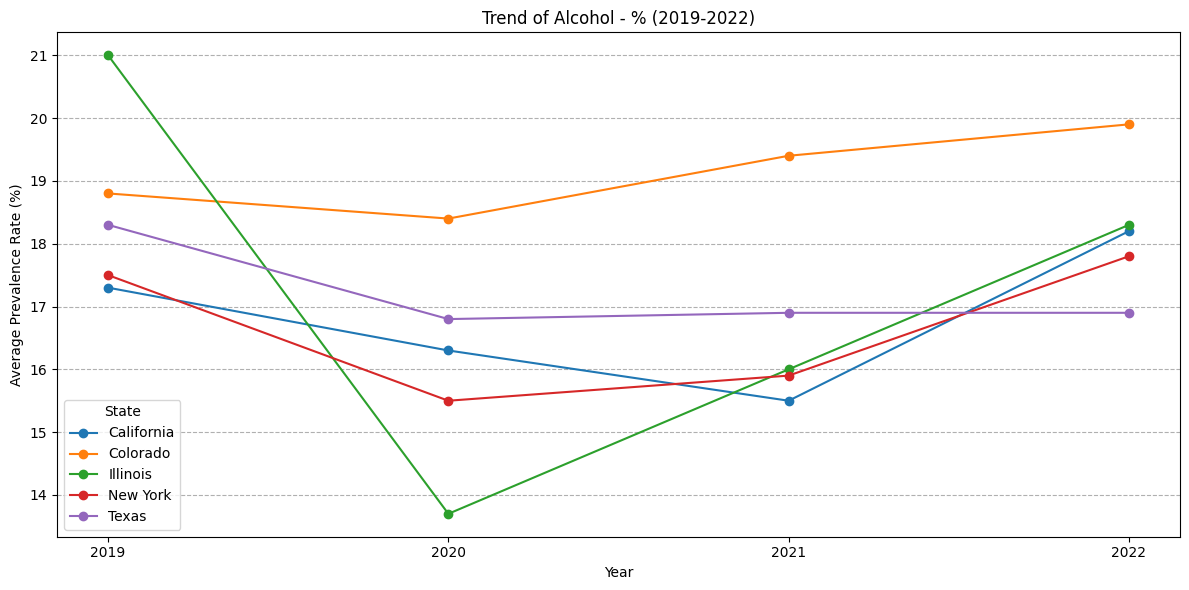

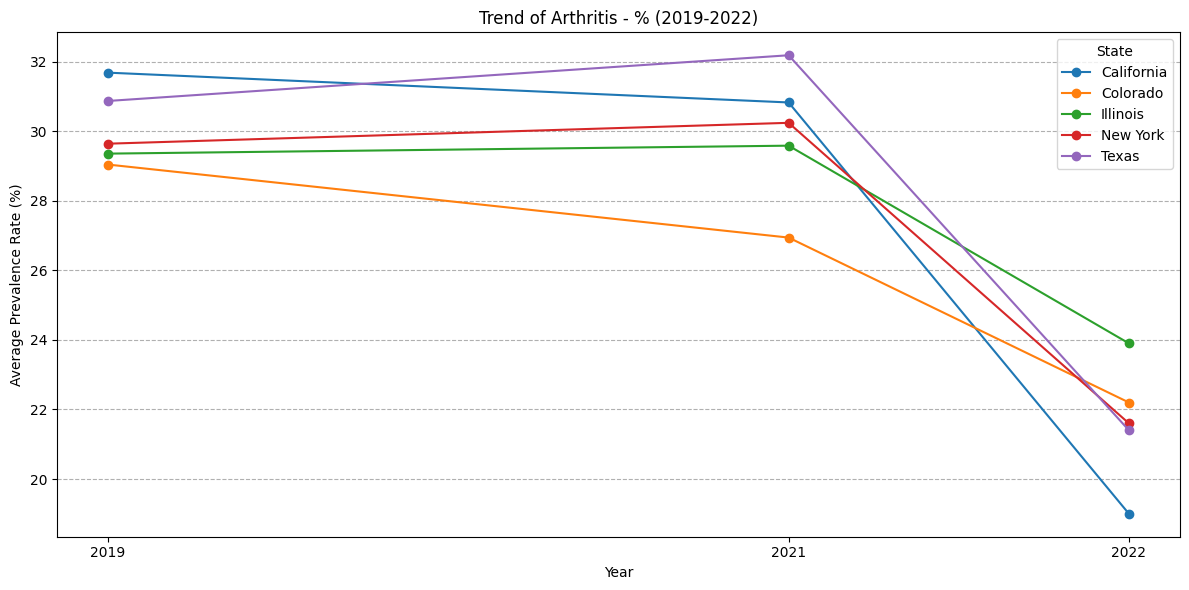

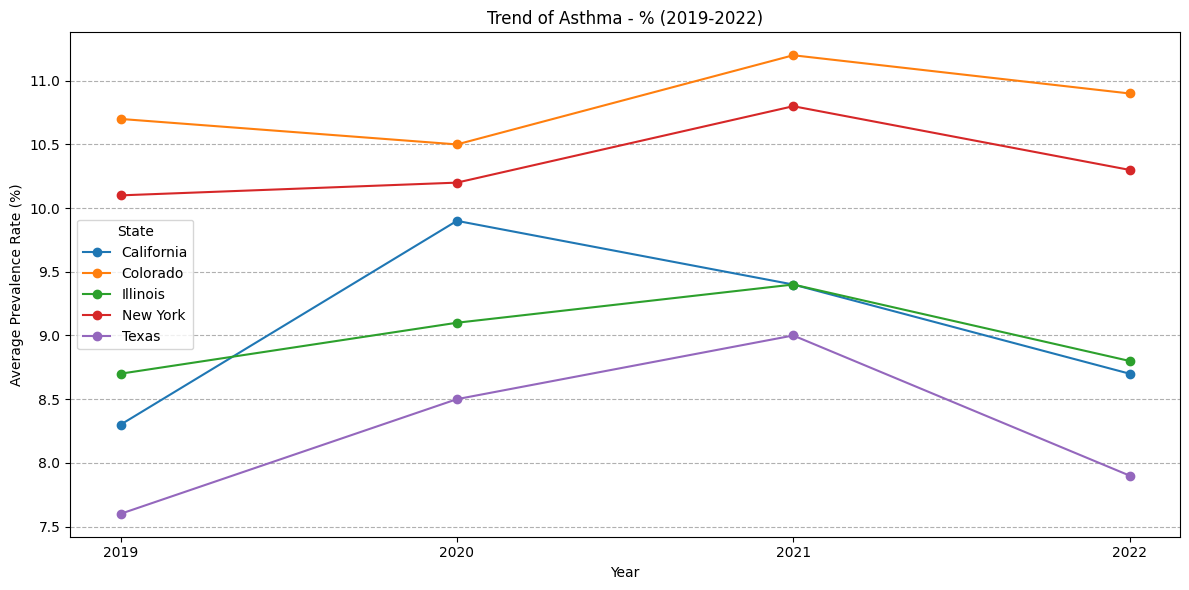

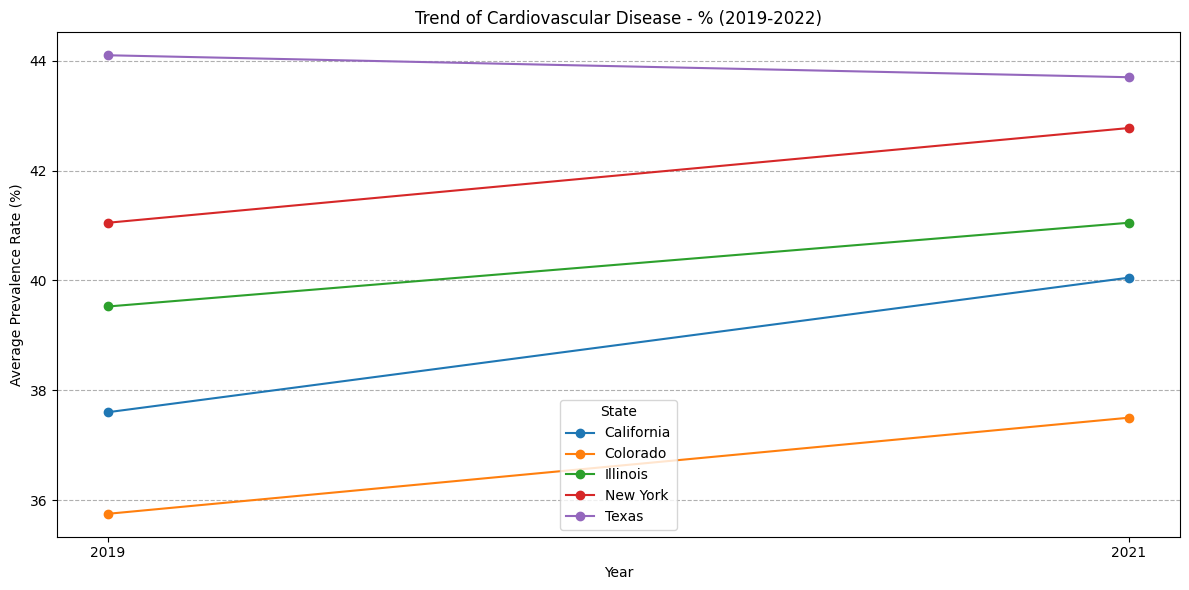

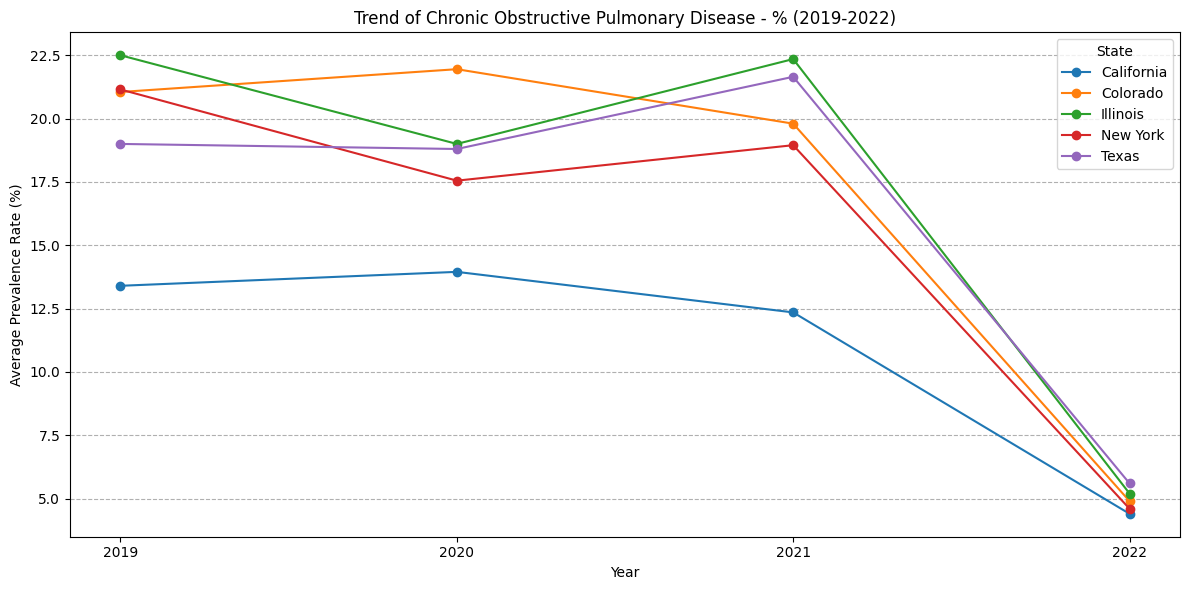

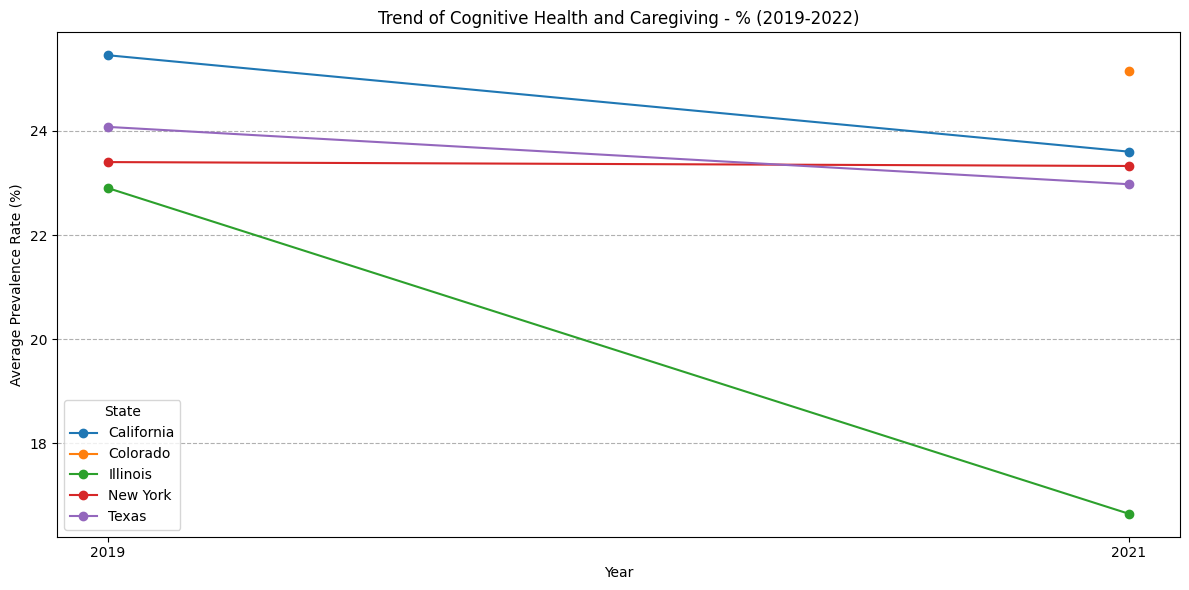

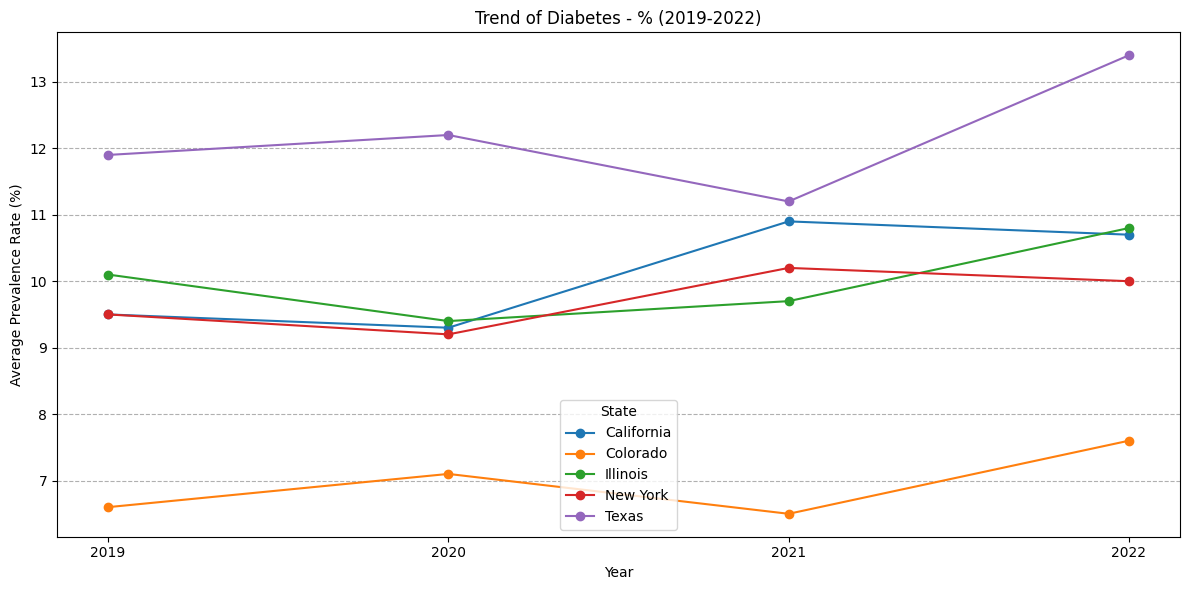

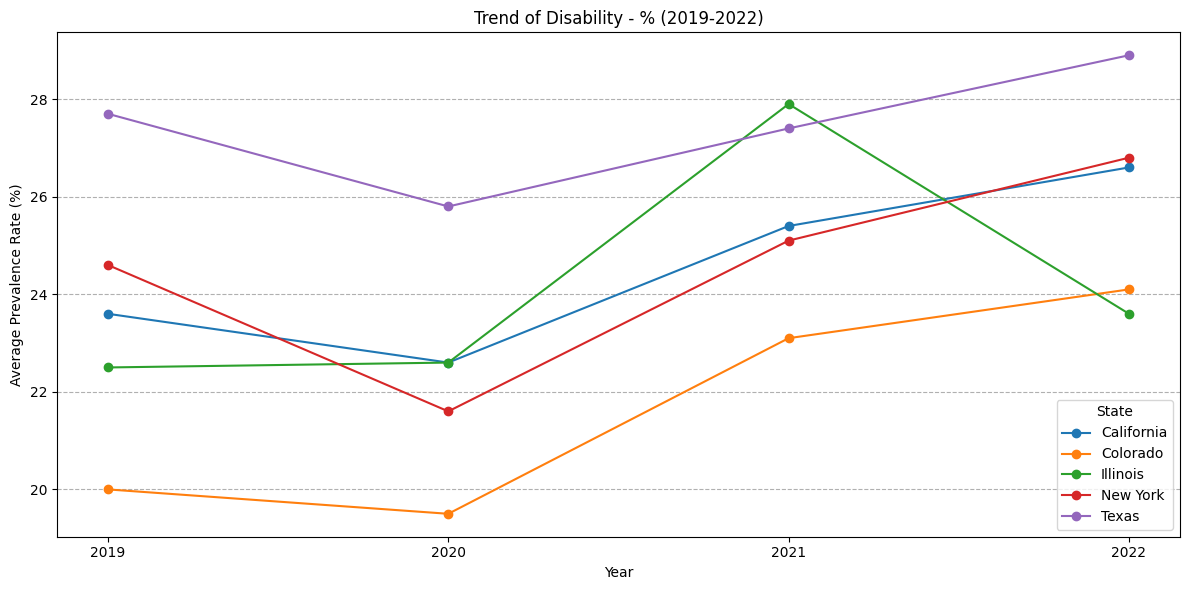

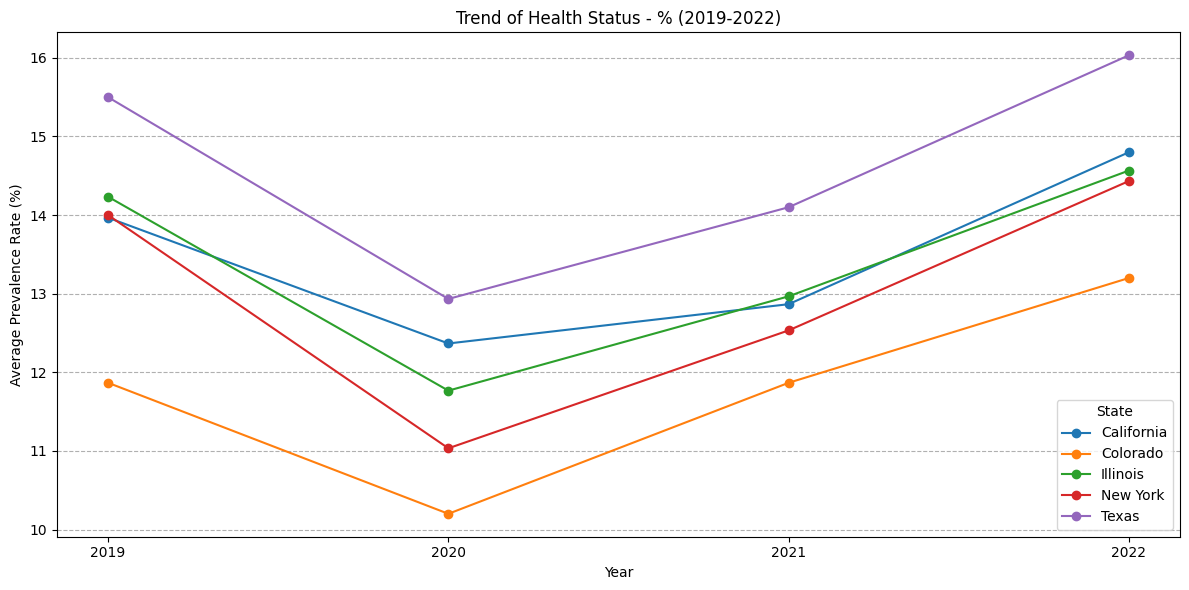

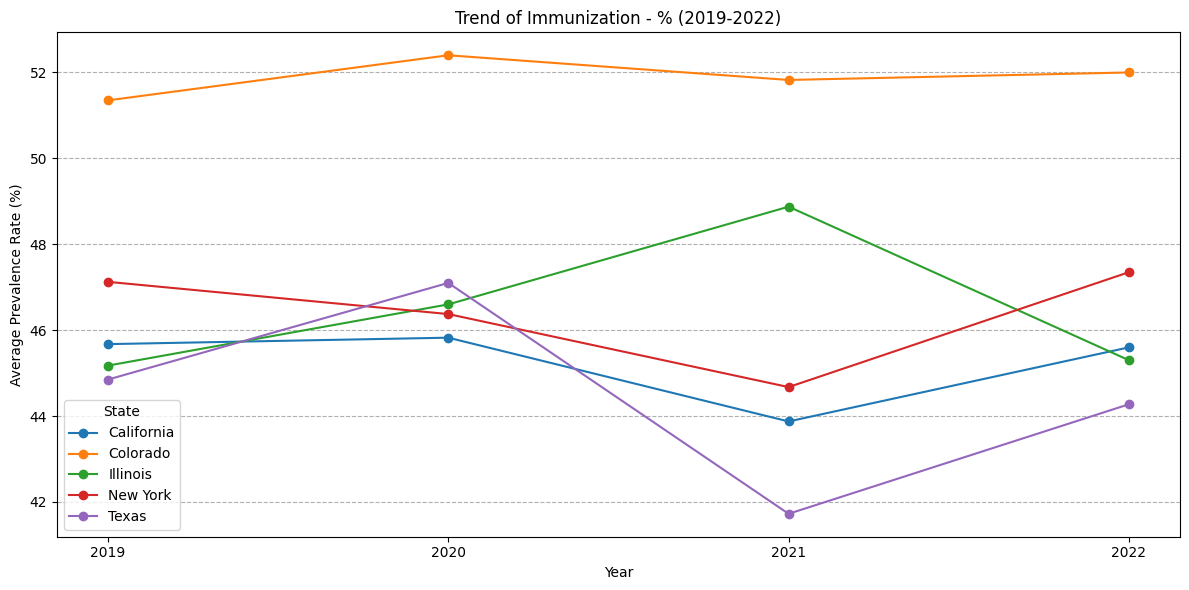

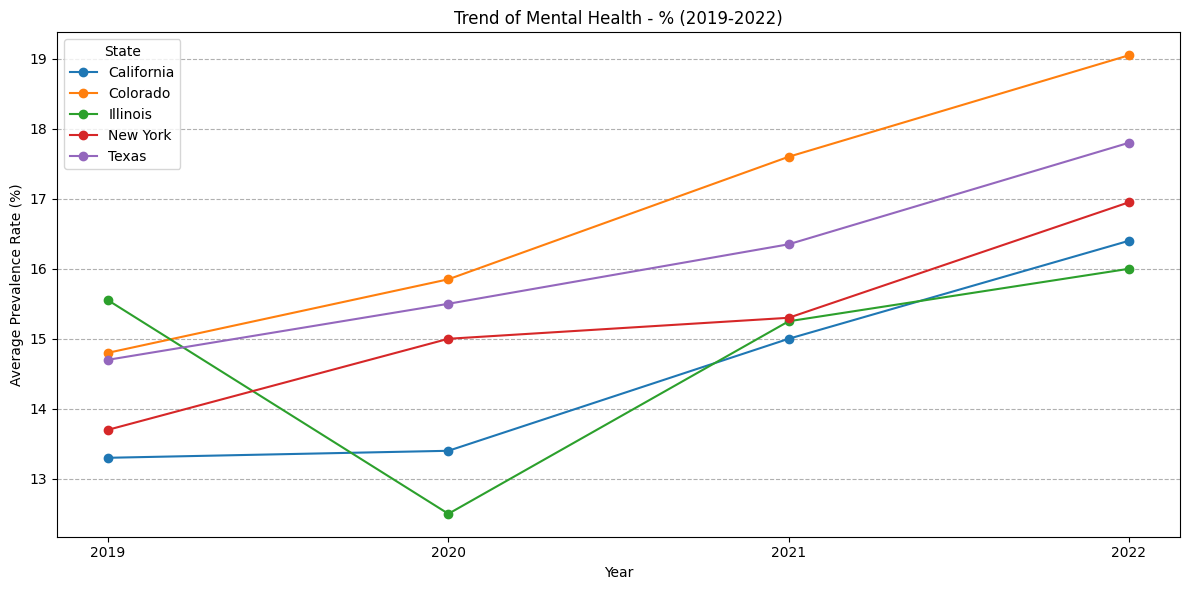

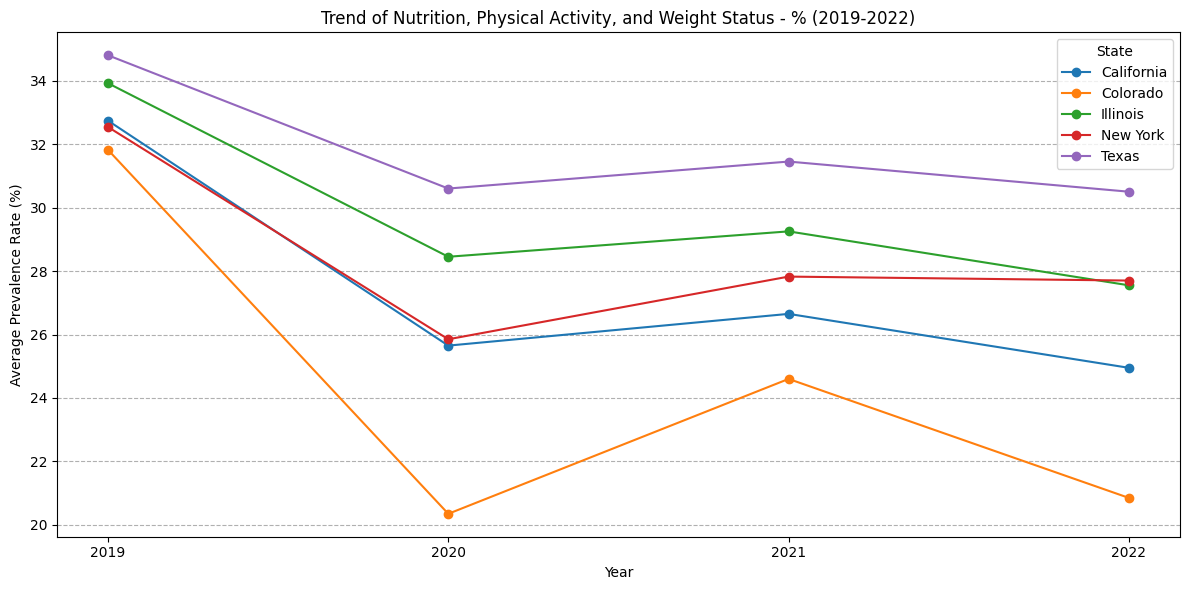

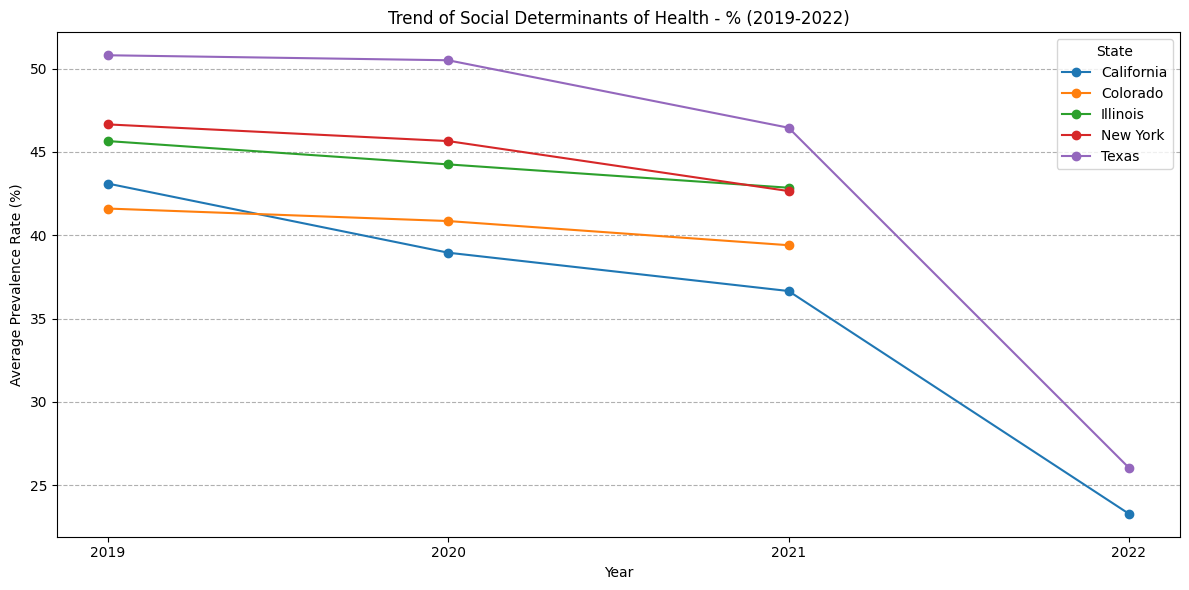

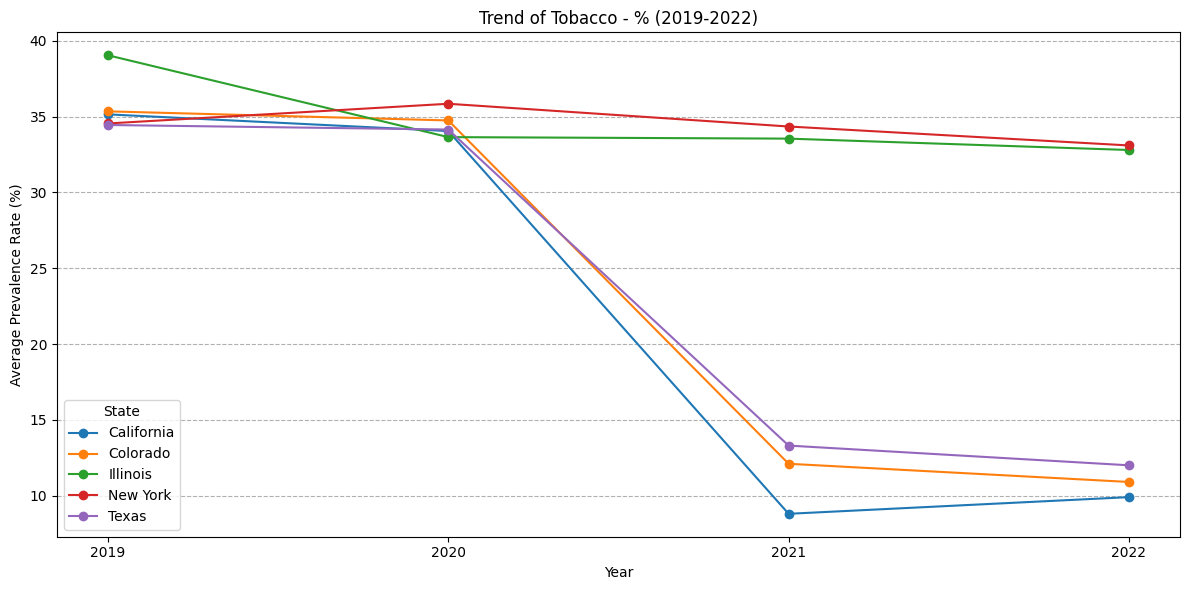

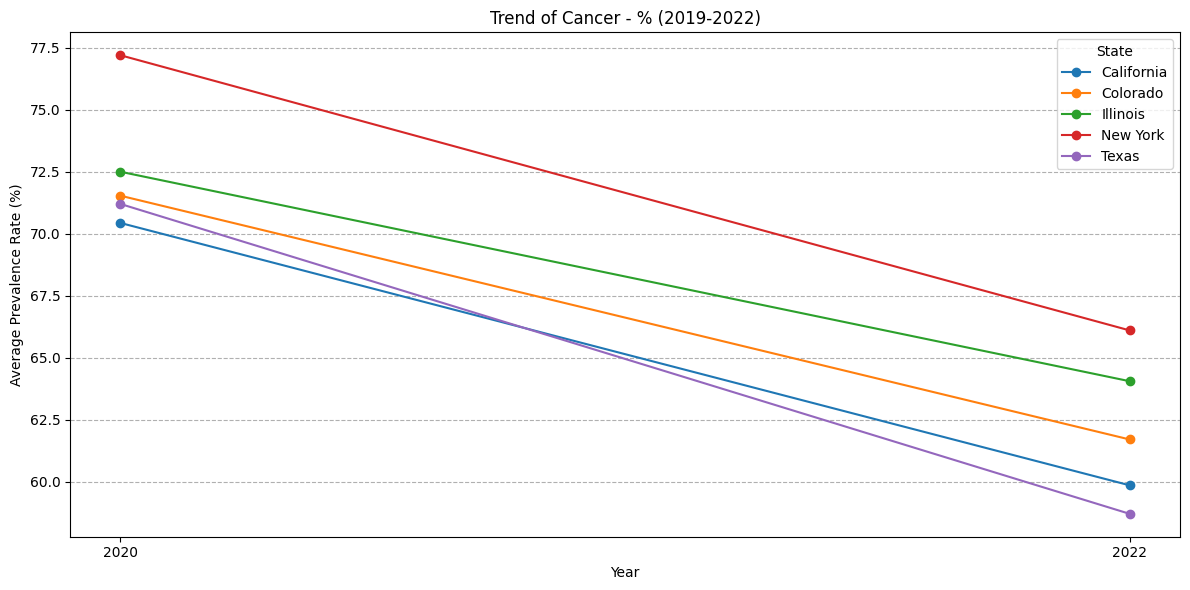

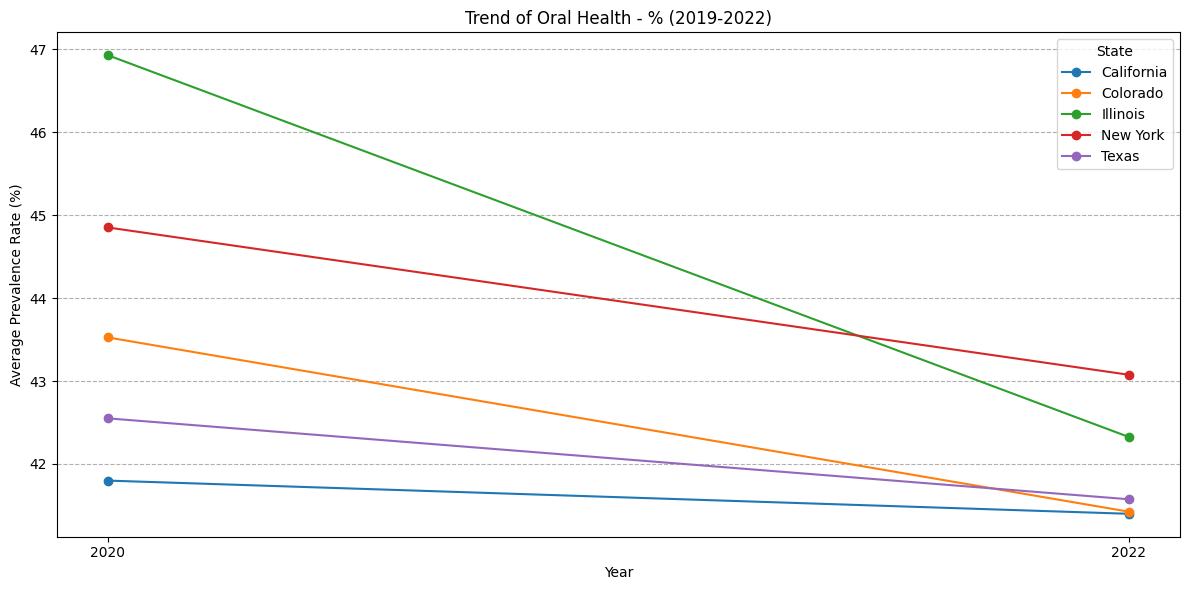

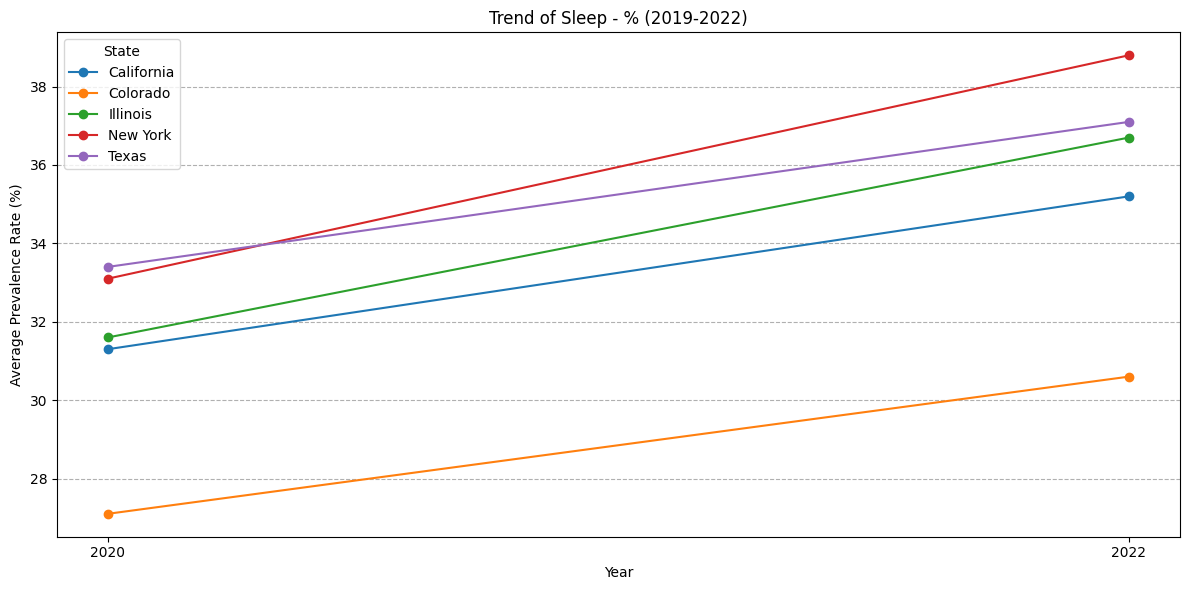

In [8]:
# U.S. trend plots
if 'df_merged_us' in locals():
    plot_us_trends(df_merged_us, RESULTS_DIR, notebook_plot=True)

# All chronic diseases trend plots
if 'df_merged_us' in locals():
    plot_all_chronic_trends(df_merged_us, RESULTS_DIR, notebook_plot=True)

# Generate global PM2.5 comparison plots


--- Generating Global Comparison Plot ---


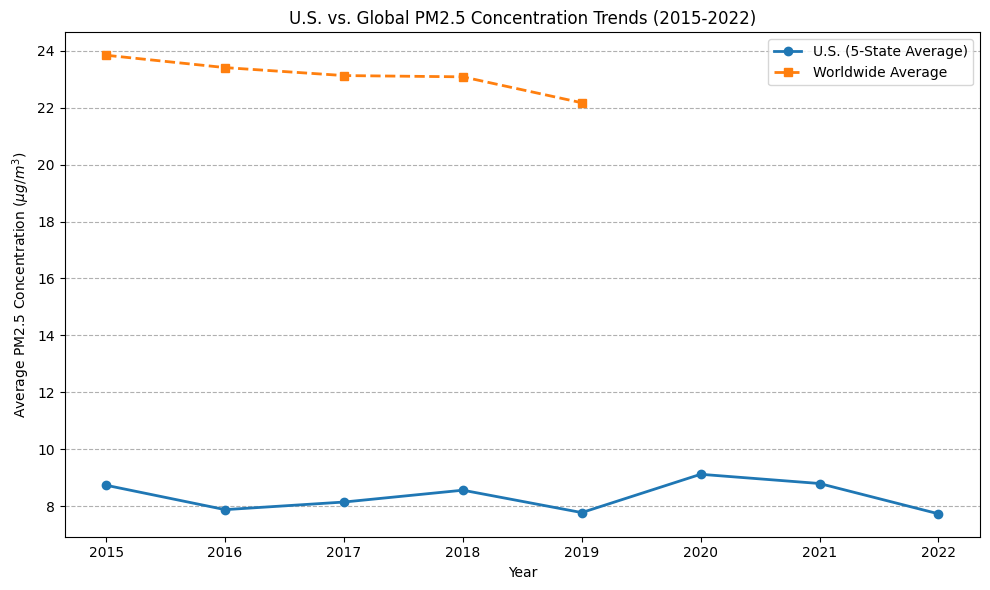

In [9]:
if 'df_merged_us' in locals() and 'df_pm25_who' in locals():
    plot_global_comparison(df_merged_us, df_pm25_who, RESULTS_DIR, notebook_plot=True)

# Generate chronic disease prevalence rate heatmap


--- Generating Chronic Disease Heatmap ---


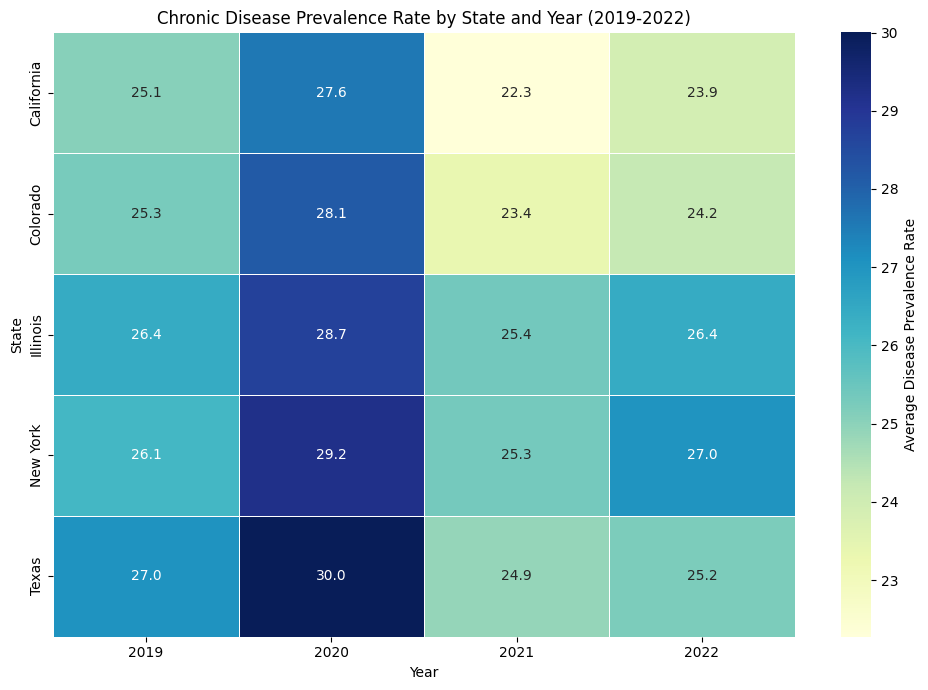

In [10]:
if 'df_merged_us' in locals():
    plot_disease_heatmap(df_merged_us, RESULTS_DIR, notebook_plot=True)